# Обработка файлов с данными из CST
$$F(\theta) = F_1(\theta)\frac{sin\left[\frac{nkd}{2}\left(sin \theta - sin \theta_M\right)\right]}{n sin\left[\frac{kd}{2}\left(sin \theta - sin \theta_M\right)\right]}$$
-------------------------
$$\left(1+x\right)^n=1+\frac{nx}{1!}+\frac{n\left(n-1\right)x^2}{2!}+\ldots$$


[  4.033     3.917     3.567     2.987     2.181     1.156    -0.07652
  -1.498    -3.08     -4.784    -6.558    -8.355   -10.15    -11.98
 -13.94    -16.21    -19.03    -22.52    -24.84    -22.5     -19.01
 -16.19    -13.92    -11.96    -10.14     -8.341    -6.545    -4.772
  -3.069    -1.487    -0.06604   1.166     2.19      2.995     3.575
   3.924     4.04      3.924     3.575     2.995     2.19      1.166
  -0.06604  -1.487    -3.069    -4.772    -6.545    -8.341   -10.14
 -11.96    -13.92    -16.19    -19.01    -22.5     -24.84    -22.52
 -19.03    -16.21    -13.94    -11.98    -10.15     -8.355    -6.558
  -4.784    -3.08     -1.498    -0.07652   1.156     2.181     2.987
   3.567     3.917  ]
72
[-180. -175. -170. ...  165.  170.  175.]
-90.0
[4.033 3.916 3.564 ... 2.98  3.564 3.916]
2664


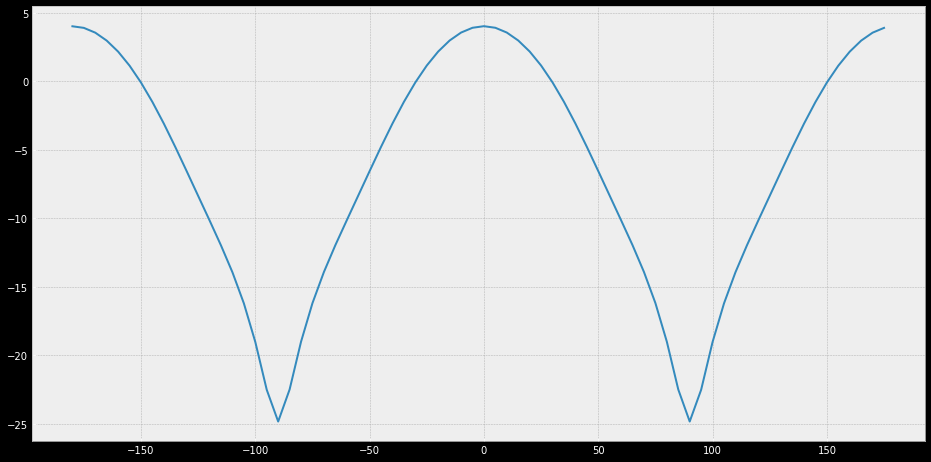

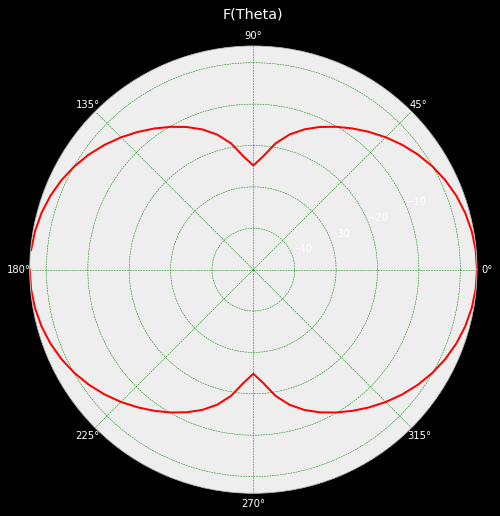

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#try:
#    f = open("C:/Users/Kondr/source/python/CST/Export/Farfield_2.txt", mode = 'r', encoding = 'utf-8')
#    for line in f:
#        print(line, end='')
#finally:
#    f.close()


with open(r"C:/Users/Kondr/source/python/CST/Export/Farfield_2.txt","r", encoding = 'utf-8') as f:
    data = f.readlines()
    N = len(data)
    theta = np.array([float(data[2][0:8])])
    phi = np.array([float(data[2][17:24])])
    F = np.array([float(data[2][35:45])])
    
    
    for i in range(1,N-2):
        phi = np.append(phi, float(data[i+2][17:24]))
        theta = np.append(theta, float(data[i+2][0:8]))
        F = np.append(F, float(data[i+2][35:45]))

N = len(theta)
phi0 = 85.0

FF1 = np.zeros(72)
theta1 = np.zeros(72)
j = 0
for i in range (0,N):
    if phi[i]==phi0:
        FF1[j] = F[i]
        theta1[j] = theta[j]
        j=j+1
    

print(FF1)
print(len(FF1))

print(theta)
print(phi[0])
print(F)
print(len(F))

 
plt.style.use('bmh')   
fig, ax1 = plt.subplots(figsize=(16,8))
ax1.plot(theta1, FF1)

fig2 = plt.figure(figsize=(20,20))
ax2 = fig2.add_subplot(231, projection='polar')
ax2.plot(theta1*np.pi/180, FF1, color='r', linewidth=2)
ax2.set_ylim(ymin=-50, ymax=max(FF1))
    # Так как 0 и 2*pi - это одна и та же точка, то значение в ней должно быть одно
    # Однако, будет разрыв между последней точкой и нулевой.
    # Чтобы его убрать, искусственно соединим эти точки.
    # Замыкаем (соединяем конец с началом)
#ax2.plot((theta[-1],theta[0]),(DN[-1],DN[0]), color='r', linewidth=1.)
ax2.grid(True, color='green', linestyle='--')
ax2.set_title("F(Theta)", loc='center')
plt.tight_layout()
